# Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.From the dataset,  we create suitable machine learning technique which classify the heart disease more accurately, it is very helpful to the health organisation as well as patients.IN addition to this, we aim to identify the important features that caused the heart disease.This dataset gives the information realated to heart disease. Dataset contain 13 features, target is the class variable which is affected by other features.The 13 features are as follows:
# 1. Age (age in years)
# 2. Sex (1 = male; 0 = female)
# 3. CP (chest pain type)
# 4. TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
# 5. CHOL (serum cholestoral in mg/dl)
# 6. FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
# 7. RESTECH (resting electrocardiographic results)
# 8. THALACH (maximum heart rate achieved)
# 9. EXANG (exercise induced angina (1 = yes; 0 = no))
# 10. OLDPEAK (ST depression induced by exercise relative to rest)
# 11. SLOPE (the slope of the peak exercise ST segment)
# 12. CA (number of major vessels (0-3) colored by flourosopy)
# 13. THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
# TARGET (1 for the heart disease or 0 for no heart disease)

In [26]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the datasets

In [27]:
# Import pandas as pd to load the datasets
import pandas as pd
# Name the datasets as df and load it using pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
# print the head of the datasets
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
# Varify the shape of the datasets
df.shape

(1025, 14)

In [29]:
# Varify the detail information of the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Visualization of the missing values via Heatmap

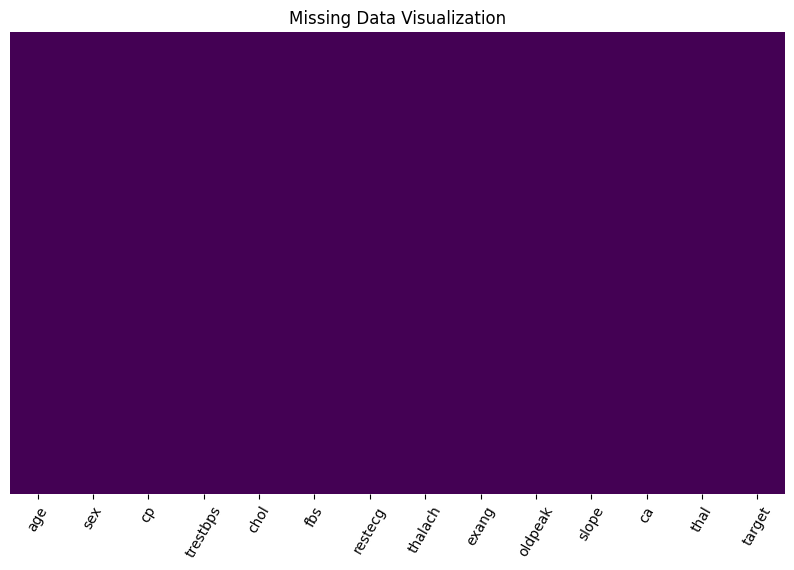

In [30]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boolean DataFrame where True indicates a missing value
missing = df.isnull()

# Create a heatmap to visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing, cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.xticks(rotation = 60)
plt.show()

In [31]:
# Print the missing values of all the features
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
# Calculate the minimum value, maximum value, mean , quartiles and standard deviation of the entire datasets
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Handling Outliers

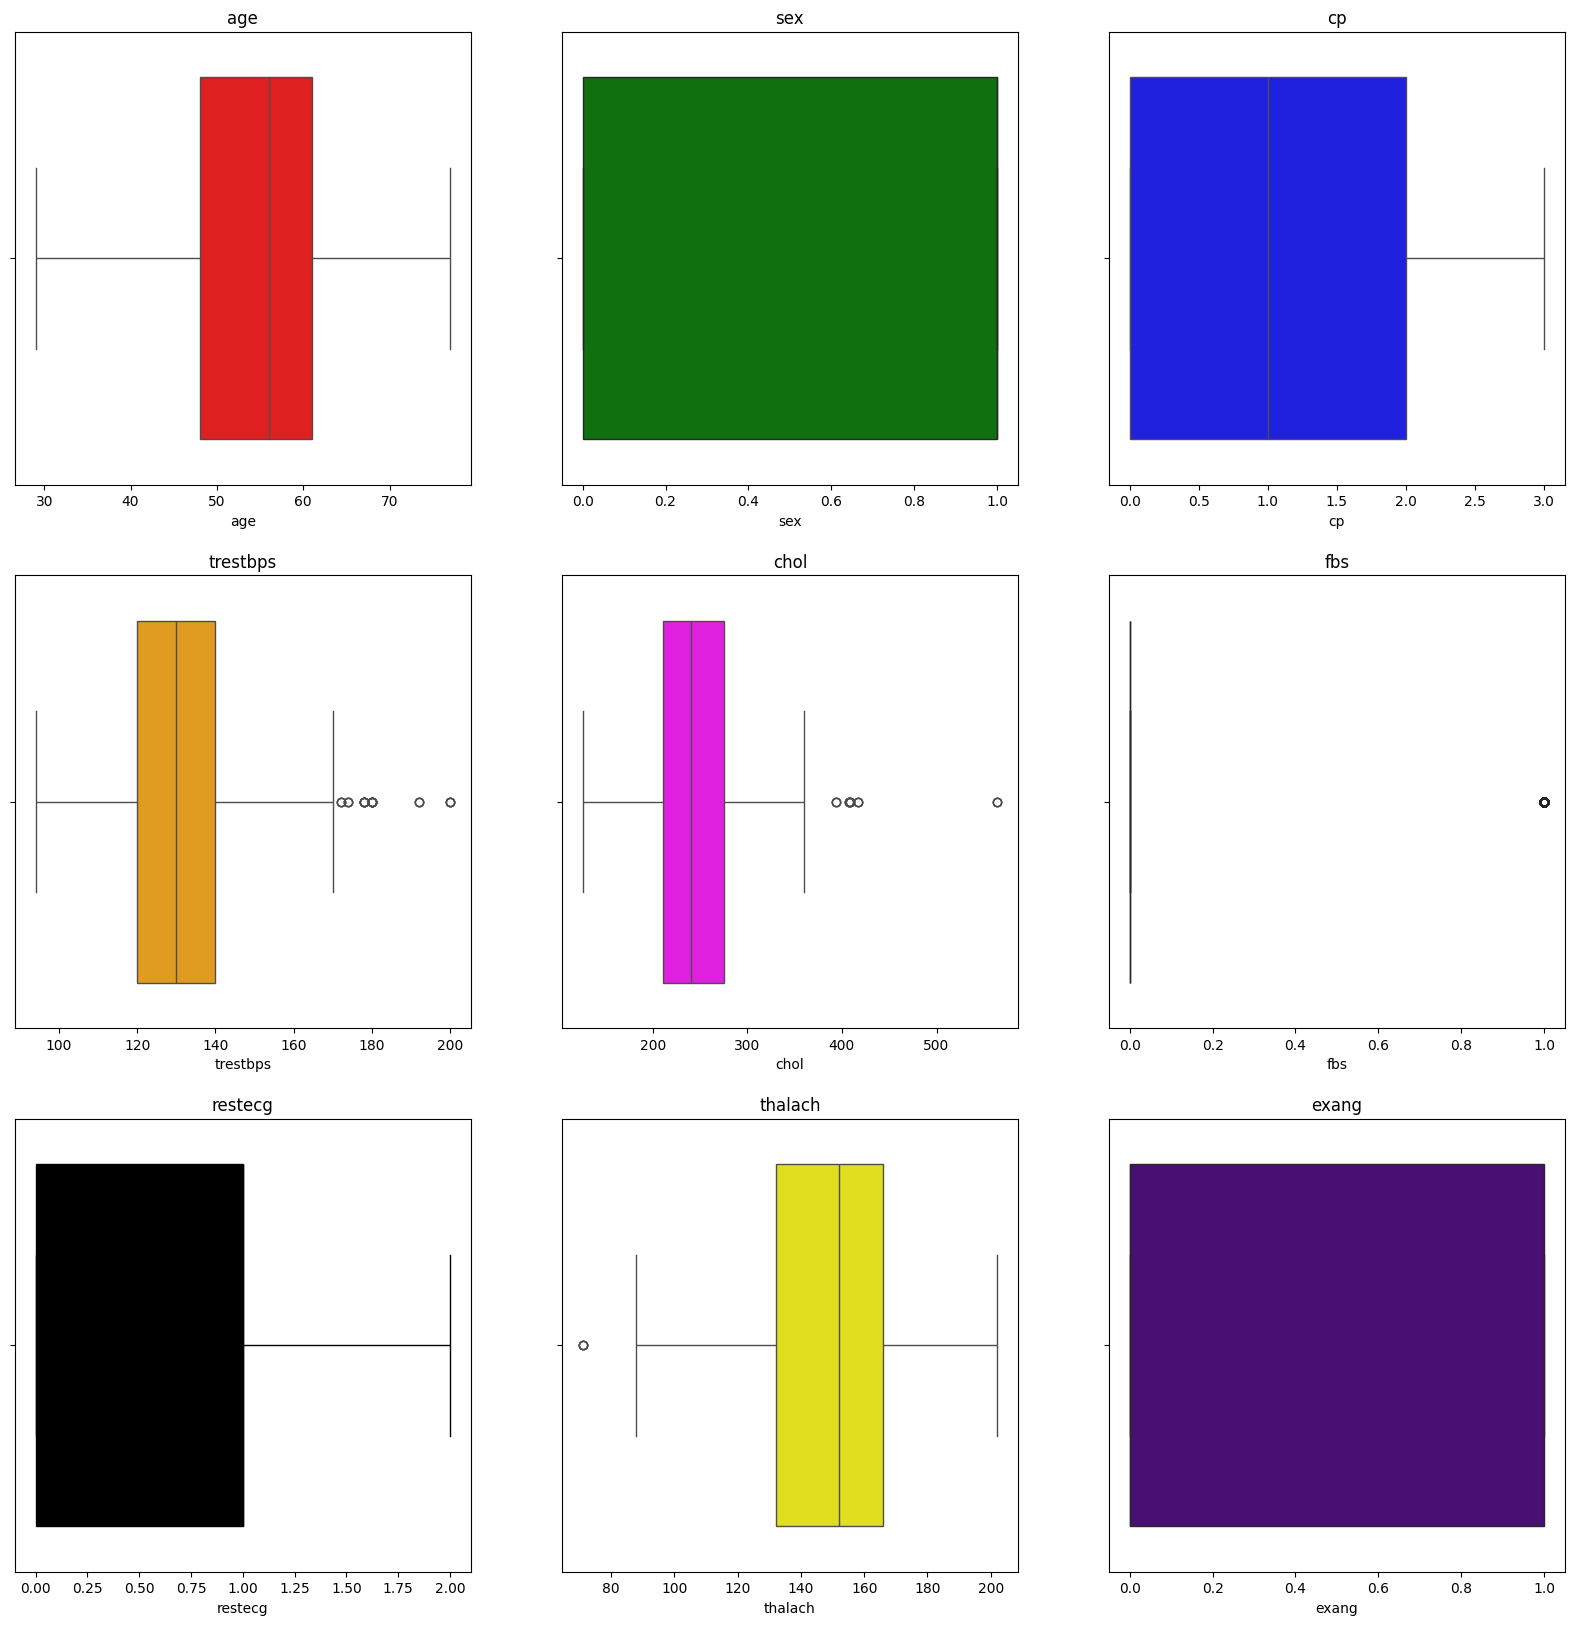

In [33]:
# Define numeric columns
numeric_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal']
# Define the figure size
plt.figure(figsize=(20, 20))
# Define colors for the different columns
colors = ['red', 'green', 'blue', 'orange', 'magenta', 'purple', 'Black', 'yellow', 'indigo']
# Using for loop to display the outliers columns
for i, col in enumerate(numeric_cols):
    if i < len(colors):  # Check if the index is within the range of colors
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df[col], color=colors[i])
        plt.title(col)
    else:
        break  # Exit the loop if there are no more colors available
# Display the graphs
plt.show()

# Varifying the number of outliers

In [34]:
# check number outliers in numeric_cols using IQR
numeric_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal']
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print(outliers_count_specified)

age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
dtype: int64


# Handling the numerical features outliers

In [35]:
df['trestbps'].describe() # Describe the resting blood pressure column

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

In [36]:
# Calculate the median of 'trestbps' to handle its outliers
median_trestbps = df['trestbps'].median()

# Replace outliers where 'trestbps' is less than 94 with the median value
df.loc[df['trestbps'] < 94, 'trestbps'] = median_trestbps

In [37]:
df['chol'].describe() # Describe the serum cholestoral column

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

In [38]:
# Calculate the mean of 'chol'to handle its outliers
mean_chol = df['chol'].mean()

# Replace outliers where 'chol' is less than 126 and more than 400 with the mean value
df.loc[df['chol'] < 126, 'chol'] = mean_chol
df.loc[df['chol'] > 400, 'chol'] = mean_chol

In [39]:
df['fbs'].describe() # Describe fasting blood pressure

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [40]:
df['thalach'].describe() # Describe the maximum heart rate achieved

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

In [41]:
# Calculate the median of 'thalch' to handle the outliers
median_thalach = df['thalach'].median()

# Replace outliers where 'trestbps' is less than 60 with the median value
df.loc[df['thalach'] < 60, 'thalach'] = median_thalach

In [42]:
df['ca'].describe()

count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: ca, dtype: float64

In [43]:
df['oldpeak'].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

In [44]:
df['thal'].describe()

count    1025.000000
mean        2.323902
std         0.620660
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: thal, dtype: float64

# Model Development

In [45]:
# Import the necessary libraries for the model develoment and evaluation
import numpy as np
#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# For data preprocessing
from sklearn.preprocessing import StandardScaler
# For data splitting
from sklearn.model_selection import train_test_split
# For data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#For ensembling
from mlxtend.classifier import StackingCVClassifier

In [46]:
# Define features and target
target = y = df["target"]
features = X = df.drop('target',axis=1)

# Split the dataset for training (80) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

# Print the shape of the training data
print("Shape of X_train (features training set):", X_train.shape)
print("Shape of y_train (target training set):", y_train.shape)

# Print the shape of the testing data
print("Shape of X_test (features testing set):", X_test.shape)
print("Shape of y_test (target testing set):", y_test.shape)

Shape of X_train (features training set): (820, 13)
Shape of y_train (target training set): (820,)
Shape of X_test (features testing set): (205, 13)
Shape of y_test (target testing set): (205,)


# Logistic Regression Classifier

In [47]:
# Name the Logistic Regression as m1
m1 = 'Logistic Regression'

# Define logistic regression with the hyperparameters
lr = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=100, class_weight='balanced', multi_class='auto')

# Train the model with the training sets
model = lr.fit(X_train, y_train)

# Use the model to predict the outcome using testing data
lr_predict = lr.predict(X_test)

# Calculate the confussion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_predict)

# Calculate the accuracy score
lr_acc_score = accuracy_score(y_test, lr_predict)

# print confussion maatrix, accuracy score and the classification report
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[77 21]
 [10 97]]


Accuracy of Logistic Regression: 84.8780487804878 

              precision    recall  f1-score   support

           0       0.89      0.79      0.83        98
           1       0.82      0.91      0.86       107

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



# GaussianNB Classifier

In [48]:
# Name Naive Bayes as m2
m2 = 'Naive Bayes'

# Define GaussianNB with hyperparameters
nb = GaussianNB(var_smoothing=1e-9)

# Train the model with the training sets
nb.fit(X_train,y_train)

# Use the model to predict the outcome using testing data
nbpred = nb.predict(X_test)

# Calculate the confussion matrix
nb_conf_matrix = confusion_matrix(y_test, nbpred)

# Calculate the accuracy score
nb_acc_score = accuracy_score(y_test, nbpred)

# Print the confussion matrix, accuracy score and the classification report
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[78 20]
 [11 96]]


Accuracy of Naive Bayes model: 84.8780487804878 

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



# Random Forest Classifier

In [49]:
# Name Random Forest Classifier as m3
m3 = 'Random Forest Classfier'

# Define RandomForestClassifier with the hyperparameters
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)

# Train the model with the training sets
rf.fit(X_train,y_train)

# Use the model to predict the outcome using testing data
rf_predicted = rf.predict(X_test)

# Calculate confussion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)

# Calculate the accuracy score
rf_acc_score = accuracy_score(y_test, rf_predicted)

# Print the confussion matrix, accuracy score and the classification report
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 90   8]
 [  2 105]]


Accuracy of Random Forest: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# eXtreme Gradient Boosting Classifier

In [50]:
# Name the Extreme Gradient Boost as m4
m4 = 'Extreme Gradient Boost'

# Define XGBClassifier with the hyperparameters
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

# Train the model with the training datasets
xgb.fit(X_train, y_train)

# Use the model to predict the outcome using testing data
xgb_predicted = xgb.predict(X_test)

# Calculate confussion matrix
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)

# Calculate the accuracy score
xgb_acc_score = accuracy_score(y_test, xgb_predicted)

# Print the confussion matrix, accuracy score and the classification report
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 84  14]
 [  3 104]]


Accuracy of Extreme Gradient Boost: 91.70731707317074 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        98
           1       0.88      0.97      0.92       107

    accuracy                           0.92       205
   macro avg       0.92      0.91      0.92       205
weighted avg       0.92      0.92      0.92       205



# K - Nearest Neighbour Classifier

In [51]:
# Name K-NeighborsClassifier as m5
m5 = 'K-NeighborsClassifier'

# Define K-NeighborsClassifier with the hyperparameters
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model with the training datasets
knn.fit(X_train, y_train)

# Use the model to predict the outcomes using testing data
knn_predicted = knn.predict(X_test)

# Calculate the confussion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)

# Calculate the accuracy score
knn_acc_score = accuracy_score(y_test, knn_predicted)

# Print the confussion matrix, accuracy score and the classification report
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [10 97]]


Accuracy of K-NeighborsClassifier: 88.29268292682927 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



# Decision Tree Classifier

In [52]:
# Name DecisionTreeClassifier as m6
m6 = 'DecisionTreeClassifier'

# Define DecisionTreeClassifier as dt with the hyperparameters
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)

# Train the model with the training datasets
dt.fit(X_train, y_train)

# Use the model to predict the outcome using testing datasets
dt_predicted = dt.predict(X_test)

# Calculate the confussion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)

# Calculate the accuracy score
dt_acc_score = accuracy_score(y_test, dt_predicted)

# Print the confussion matrix, Accuracy score and the classification report
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[95  3]
 [ 8 99]]


Accuracy of DecisionTreeClassifier: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



# Support Vector Classifier

In [53]:
# Name support vector classifier as m7
m7 = 'Support Vector Classifier'

# Define SVC with the hyperparameters
svc =  SVC(kernel='rbf', C=2)

# Train the model with the training datasets
svc.fit(X_train, y_train)

# Use the model to predict the outcomes using testing datasets
svc_predicted = svc.predict(X_test)

# Calculate the confussion matrix
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)

# Calculate the accuracy score
svc_acc_score = accuracy_score(y_test, svc_predicted)

# Print the confussion matrix, accuracy score, and the classificaton report
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[ 96   2]
 [  0 107]]


Accuracy of Support Vector Classifier: 99.02439024390245 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.98      1.00      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# Calculation of the important Features that cause the Heart Disease By Highest Performing Model

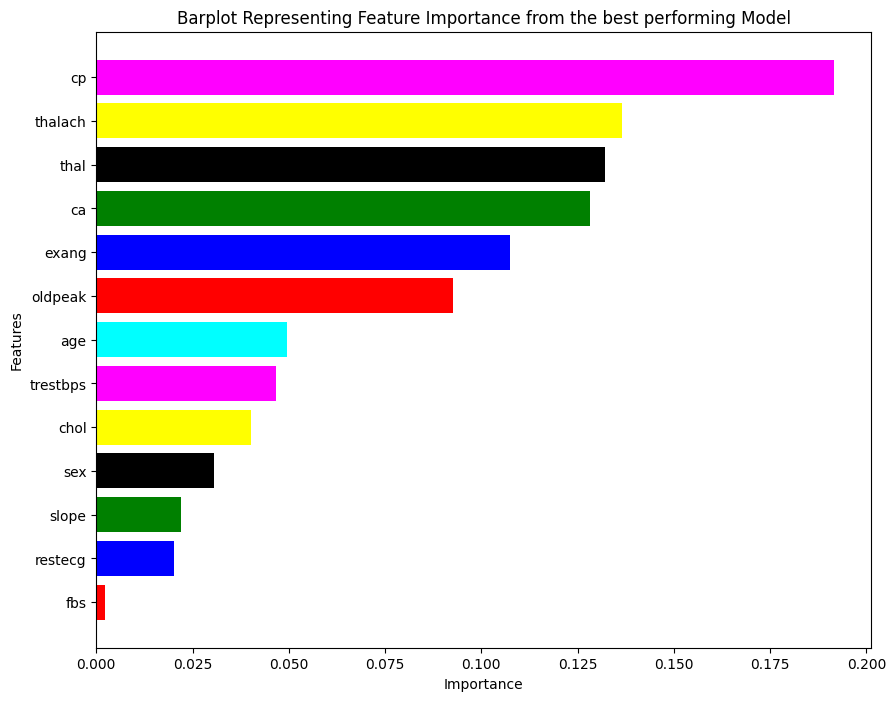

In [54]:
# List out all the features to identify its importance level
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': rf.feature_importances_})

# Sorting the DataFrame by importance for better visual representation
imp_feature = imp_feature.sort_values('Importance', ascending=True)

# Define the figure size
plt.figure(figsize=(10, 8))
plt.title("Barplot Representing Feature Importance from the best performing Model")
plt.xlabel("Importance")
plt.ylabel("Features")

# Defining a color list for better visualization
colors = ['red', 'blue', 'green', 'black', 'yellow', 'magenta', 'cyan'] * (len(imp_feature) // 7 + 1)

# Display the visualization
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=colors[:len(imp_feature)])
plt.show()

# Calculate the important features using the Logistic Regression

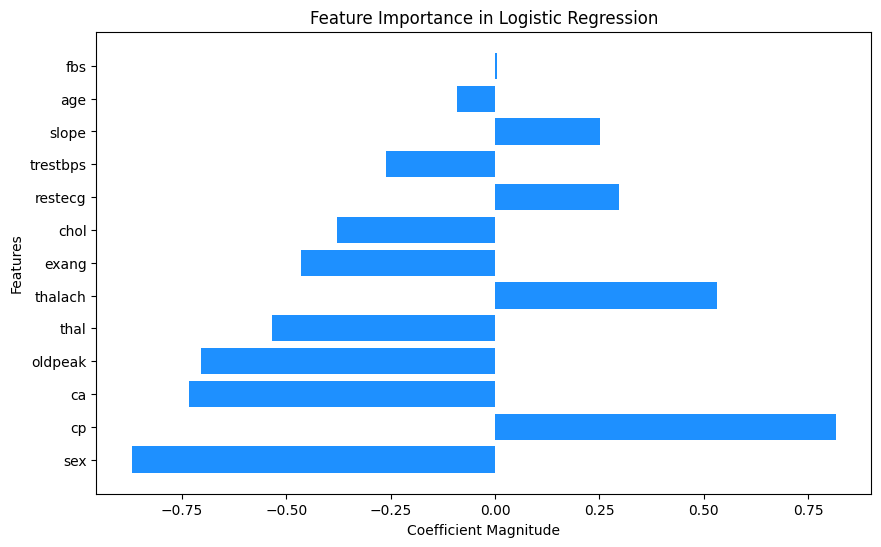

In [55]:
# Extract the coefficients to identify the important features using Logistic Regression
feature_importance = lr.coef_[0]

# Create a DataFrame for easier visualization
features = pd.DataFrame(data={'Feature': X.columns, 'Importance': feature_importance})
features = features.sort_values(by='Importance', key=abs, ascending=False)  # Sort by absolute value

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features['Feature'], features['Importance'], color='dodgerblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.show()

# Visualization of the Models via ROC-AUC Curve

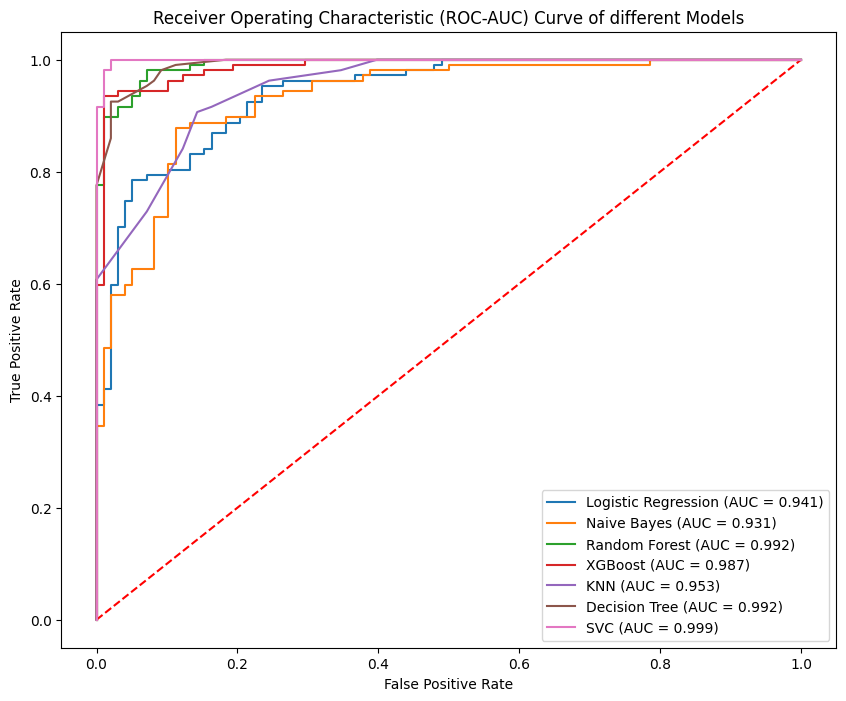

In [56]:
# Import necessary functions
from sklearn.metrics import roc_curve, roc_auc_score

# Prepare a dictionary with your models
models = {
    'Logistic Regression': LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=100, class_weight='balanced', multi_class='auto'),
    'Naive Bayes': GaussianNB(var_smoothing=1e-9),
    'Random Forest': RandomForestClassifier(n_estimators=20, random_state=2, max_depth=5),
    'XGBoost': XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52),
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6),
    'SVC': SVC(kernel='rbf', C=2, probability=True)  # Ensure probability is True for ROC calculation
}

# Plot setup for the visualization
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic (ROC-AUC) Curve of different Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], 'r--')  # Plotting the diagonal line for reference

# Train each model and plot their ROC Curve
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        # For classifiers with predict_proba like RandomForest
        pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For classifiers with decision_function like SVC
        pred_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, pred_prob)
    auc = roc_auc_score(y_test, pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

# Define legend and display the graph
plt.legend(loc='lower right')
plt.show()

# Model Evaluation

In [57]:
# Define MOdel Evaluation based on the accuracy score
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})

# Print the list of the evaluation
print(model_ev)

                    Model   Accuracy
0     Logistic Regression  84.878049
1             Naive Bayes  84.878049
2           Random Forest  95.121951
3  Extreme Gradient Boost  91.707317
4     K-Nearest Neighbour  88.292683
5           Decision Tree  94.634146
6  Support Vector Machine  99.024390


# Visualization of the Model Evaluation via Bar Graph

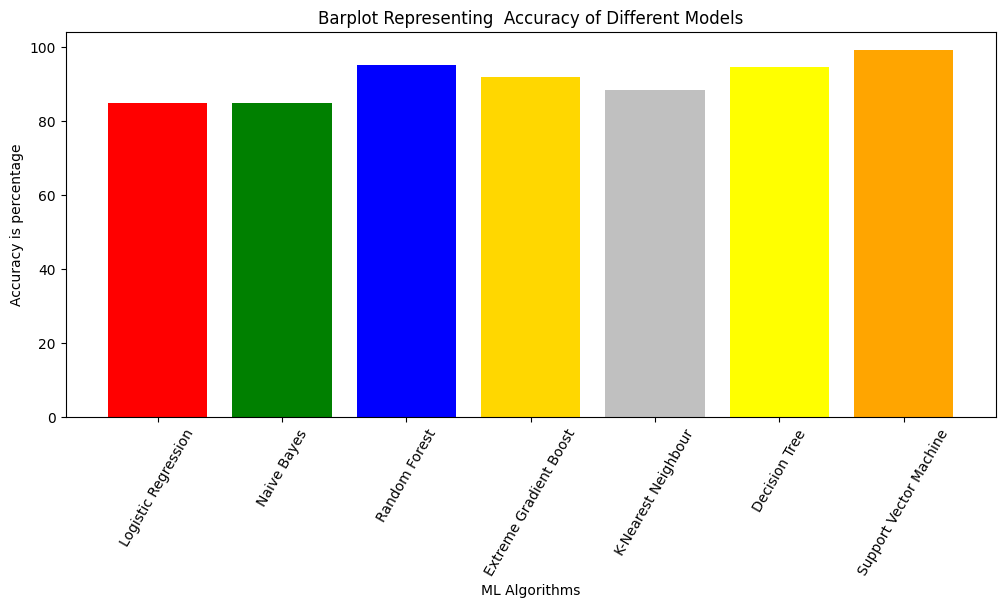

In [58]:
# Define the colors
colors = ['red','green','blue','gold','silver','yellow','orange',]

# Define the figure size
plt.figure(figsize=(12,5))

# Display the models via Bar Graph
plt.title("Barplot Representing  Accuracy of Different Models")
plt.xticks(rotation = 60)
plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy is percentage")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

# Ensembling method to increase the models accuracy via stacking

In [59]:
# Initialize individual classifiers
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=5)
dt = DecisionTreeClassifier(random_state=42, max_depth=6)
svc = SVC(kernel='rbf', C=2, probability=True, random_state=42)  # Ensure probability is set to True

# Define the meta-classifier
meta_classifier = LogisticRegression(random_state=42)

# Initialize StackingCVClassifier and name it m7
m7 = StackingCVClassifier(classifiers=[rf, dt, svc],
                          meta_classifier=meta_classifier,
                          use_probas=True,  # Use probabilities as meta-features
                          cv=5,            # 5-fold cross-validation
                          random_state=42)

# Train the model with the training datasets
m7.fit(X_train, y_train)

# Use the model to predict the outcomes using the testing datasets
m7_predicted = m7.predict(X_test)

# Evaluate the model with the confussion matrix and accuracy score
m7_conf_matrix = confusion_matrix(y_test, m7_predicted)
m7_acc_score = accuracy_score(y_test, m7_predicted)

# Display Results
print("Confusion matrix:")
print(m7_conf_matrix)
print("\n")
print(f"Accuracy of StackingCVClassifier: {m7_acc_score*100:.2f}%\n")
print(classification_report(y_test, m7_predicted))

Confusion matrix:
[[ 97   1]
 [  0 107]]


Accuracy of StackingCVClassifier: 99.51%

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        98
           1       0.99      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      0.99      1.00       205
weighted avg       1.00      1.00      1.00       205



# Visualization of the Ensembling method via ROC-AUC Curve

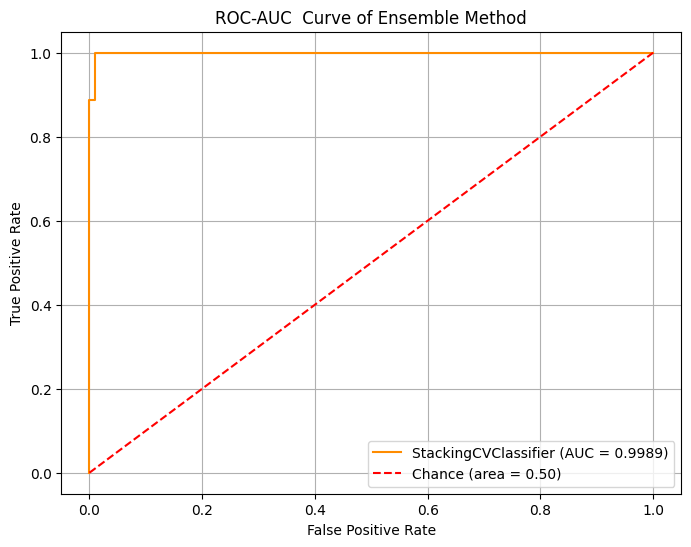

In [60]:
# Get prediction probabilities for the positive class
m7_probs = m7.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Compute ROC curve and AUC for the visualization
m7_fpr, m7_tpr, _ = roc_curve(y_test, m7_probs)
m7_auc = roc_auc_score(y_test, m7_probs)

# Plot ROC curve for the visualization
plt.figure(figsize=(8, 6))
plt.plot(m7_fpr, m7_tpr, label=f'StackingCVClassifier (AUC = {m7_auc:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'r--', label='Chance (area = 0.50)')  # chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC  Curve of Ensemble Method')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()